## Foreword
In this Jupyter Notebook, I'll calculate the values of $S$ and $R$ for the Square Barrier problem at a variety of particle energies ($E$). I will demonstrate that $|S|^{2} + |R|^{2} = 1$ for all tested values of $E$ and compare my calculated values of $S$ and $R$ to those computed from formulae provided on [Wikipedia](https://en.wikipedia.org/wiki/Rectangular_potential_barrier). Also, I'll plot both my calculated and the expected values of $|S|^{2}$ and $|R|^{2}$ against $E$.

## Function Definitions

First, I'll import required packages/modules and establish some variables that will be used throughout my calculations.

In [1]:
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define some global variables (in AU) for calculations
m = 1837 # mass of a hydrogen atom in AU
V_0 = 8e-4
h_bar = 1 
a = 3

In [3]:
# establish imaginary unit
i = 1j

The following three functions will be used to calculate $k$, $k'$, and $\kappa$.

In [4]:
def calculate_k(E):
    return math.sqrt(2 * m * E) / h_bar

In [5]:
def calculate_k_prime(E):
    return math.sqrt(2 * m * (E - V_0)) / h_bar

In [6]:
def calculate_kappa(E):
    return math.sqrt(2 * m * (V_0 - E)) / h_bar

The next four functions will be used to calculate the matrices $M_{L}$, $M_{R}$, $\widetilde{M}$, and $M$ (defined in Dr. Carrington's notes).

In [7]:
def calculate_M_L(k):
    return np.array([[1, 1], 
                     [i * k, -i * k]])

In [8]:
def calculate_M_R(E, k_prime=None, kappa=None):
    if E > V_0:
        return np.array([[1, 1], 
                         [i * k_prime, -i * k_prime]])
    else:
        return np.array([[1, 1], 
                         [kappa, -kappa]])

In [9]:
def calculate_M_tilda(E, k_prime=None, kappa=None):
    if E > V_0:
        return np.array([[cmath.exp(i * k_prime * a), cmath.exp(-i * k_prime * a)], 
                         [i * k_prime * cmath.exp(i * k_prime * a), -i * k_prime * cmath.exp(-i * k_prime * a)]])
    else:
        return np.array([[cmath.exp(kappa * a), cmath.exp(-kappa * a)], 
                         [kappa * cmath.exp(kappa * a), -kappa * cmath.exp(-kappa * a)]])

In [10]:
def calculate_M(M_L, M_R, M_tilda):
    return np.matmul(M_tilda, np.matmul(np.linalg.inv(M_R), M_L))

The function below is where the magic happens; it calls the above functions as required and calculates $S$ and $R$ from the 2 x 2 system of linear equations established in Dr. Carrington's notes.

In [11]:
def calculate_s_and_r(E):
    k = calculate_k(E)
    M_L = calculate_M_L(k)
    
    # calculate M_R and M_tilda depending on value of energy relative to potential
    if E > V_0:
        k_prime = calculate_k_prime(E)
        M_R = calculate_M_R(E, k_prime=k_prime)
        M_tilda = calculate_M_tilda(E, k_prime=k_prime)
        
    else:
        kappa = calculate_kappa(E)
        M_R = calculate_M_R(E, kappa=kappa)
        M_tilda = calculate_M_tilda(E, kappa=kappa)

    M = calculate_M(M_L, M_R, M_tilda)
    
    # set up system of linear equations to solve for s and r
    A = np.array([[-cmath.exp(i * k * a), M[0][1]], 
                  [-i * k * cmath.exp(i * k * a), M[1][1]]])
    b = np.array([[-M[0][0]], 
                  [-M[1][0]]])
    x = np.matmul(np.linalg.inv(A), b)
    
    s = x[0][0]
    r = x[1][0]

    return s, r

The two functions in the below code cell calculate $S$ and $R$ using the aforementioned equations from Wikipedia.

In [12]:
def calculate_s(k0, k1):
    num = 4 * k0 * k1 * cmath.exp(-i * a * (k0 - k1))
    denom = (k0 + k1) ** 2 - cmath.exp(2 * i * a * k1) * (k0 - k1) ** 2
    return num / denom

def calculate_r(k0, k1):
    num = (k0 ** 2 - k1**2) * math.sin(a * k1)
    denom = 2 * i * k0 * k1 * math.cos(a * k1) + (k0 **2 + k1 ** 2) * math.sin(a * k1)
    return num / denom

## Comparing My Results to Wikipedia Numerically

Below, I print the values of $S$, $R$, $|S|^{2}$, and $|R|^{2}$ evaluated for different energies ($E$) using both my code (Calculated) and the formulae from Wikipedia (Expected). Inspection of the cell's output demonstrates that, within reason, my code reproduces the results from Wikipedia. Additionally, I show that both my code and Wikipedia produce the result, $|S|^{2} + |R|^{2} = 1$, for all $E$ tested.

In [13]:
energies = np.logspace(-10, -2, 5)

for E in energies:
    k0 = calculate_k(E)
    if E > V_0:
        k1 = calculate_k_prime(E)
    else:
        k1 = calculate_kappa(E)

    calculated_s, calculated_r = calculate_s_and_r(E)
    expected_s = calculate_s(k0, k1)
    expected_r = calculate_r(k0, k1)
    print(f"Energy = {E}")
    print()
    print("         S")
    print("--------------------")
    print("Calculated:", calculated_s)
    print("Expected:  ", expected_s)
    print()
    print("         R")
    print("--------------------")
    print("Calculated:", calculated_r)
    print("Expected:  ", expected_r)
    print()
    print("        s^2")
    print("--------------------")
    print("Calculated:", abs(calculated_s) ** 2)
    print("Expected:  ", abs(expected_s) ** 2)
    print()
    print("        r^2")
    print("--------------------")
    print("Calculated:", abs(calculated_r) ** 2)
    print("Expected:  ", abs(expected_r) ** 2)
    print()
    print("|s| ** 2 + |r| ** 2:")
    print("--------------------")
    print("Calculated:", abs(calculated_s) ** 2 + abs(calculated_r) ** 2)
    print("Expected:  ", abs(expected_s) ** 2 + abs(expected_r) ** 2)
    if E != energies[-1]:
        print()
        print()
        print()
        print()
        print()

Energy = 1e-10

         S
--------------------
Calculated: (-9.176261528409668e-09-8.25760046735402e-06j)
Expected:   (-1.1621945379036934e-06-0.0007782234158069996j)

         R
--------------------
Calculated: (-0.999999749931812-0.0007071549515357224j)
Expected:   (-0.9999996443668755-0.000325012441220488j)

        s^2
--------------------
Calculated: 6.818804968222099e-11
Expected:   6.056330356064581e-07

        r^2
--------------------
Calculated: 0.9999999999318119
Expected:   0.9999993943669645

|s| ** 2 + |r| ** 2:
--------------------
Calculated: 0.9999999999999999
Expected:   1.0





Energy = 1e-08

         S
--------------------
Calculated: (-9.176306008384927e-07-8.25730738953645e-05j)
Expected:   (-0.000116214516132404-0.007781172368310972j)

         R
--------------------
Calculated: (-0.9999749931810159-0.007071505742953548j)
Expected:   (-0.9999644389617348-0.0032497173267219417j)

        s^2
--------------------
Calculated: 6.819154578448923e-09
Expected:   6.0

## Comparing My Results to Wikipedia Graphically

As the last part of this assignment, I'll make plots of $|S|^{2}$ vs. $E$ and $|R|^{2}$ vs. $E$ for both my code and what is expected from Wikipedia. Qualitatively, both my code and Wikipedia give very simililar results, which are intuitive; as particle energy increases, the probability of transmission through the barrier increases ($|S|^{2}$ gets closer to 1); conversely, as particle energy decreases, the probability of reflection off the barrier increases ($|R|^{2}$ gets closer to 1).

In [14]:
energies = np.logspace(-10, -2, 100)
S = []
R = []
S_expected = []
R_expected = []

for E in energies:
    k0 = calculate_k(E)
    if E > V_0:
        k1 = calculate_k_prime(E)
    else:
        k1 = calculate_kappa(E)
        
    s, r = calculate_s_and_r(E)
    S.append(abs(s) ** 2)
    R.append(abs(r) ** 2)
    
    S_expected.append(abs(calculate_s(k0, k1)) ** 2)
    R_expected.append(abs(calculate_r(k0, k1)) ** 2)

### $|S|^{2}$ v.s. $E$ Using My Code

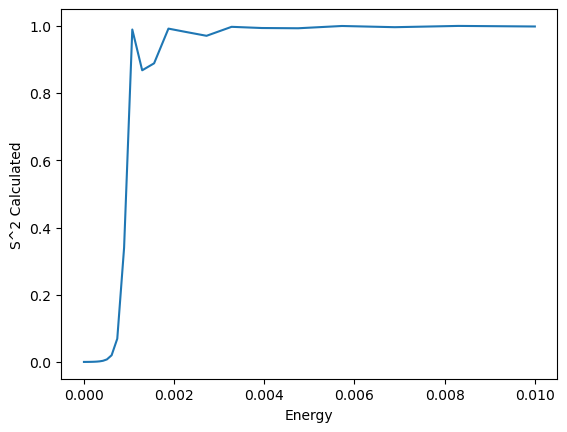

In [15]:
plt.xlabel("Energy")
plt.ylabel("S^2 Calculated")
plt.plot(energies, S)

### $|S|^{2}$ v.s. $E$ Using Wikipedia

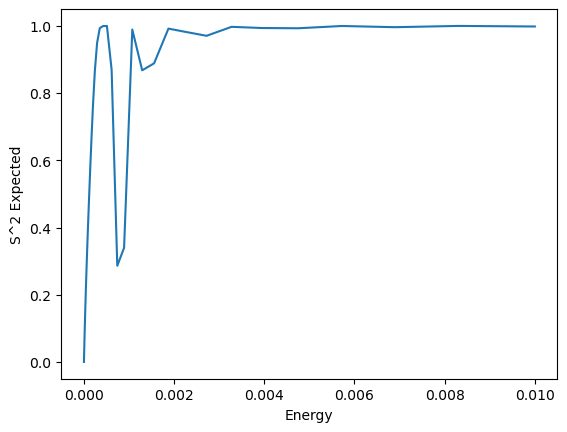

In [16]:
plt.xlabel("Energy")
plt.ylabel("S^2 Expected")
plt.plot(energies, S_expected)

### $|R|^{2}$ v.s. $E$ Using My Code

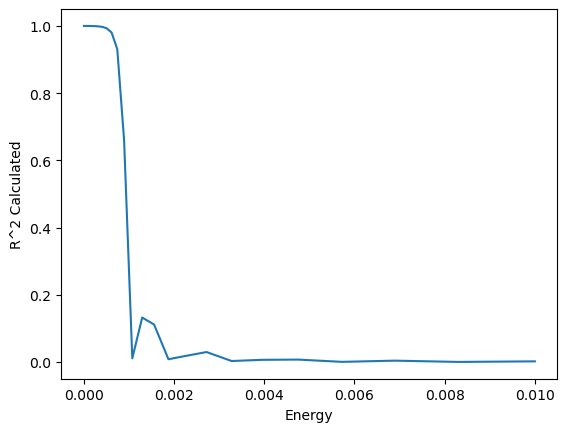

In [17]:
plt.xlabel("Energy")
plt.ylabel("R^2 Calculated")
plt.plot(energies, R)

### $|R|^{2}$ v.s. $E$ Using Wikipedia

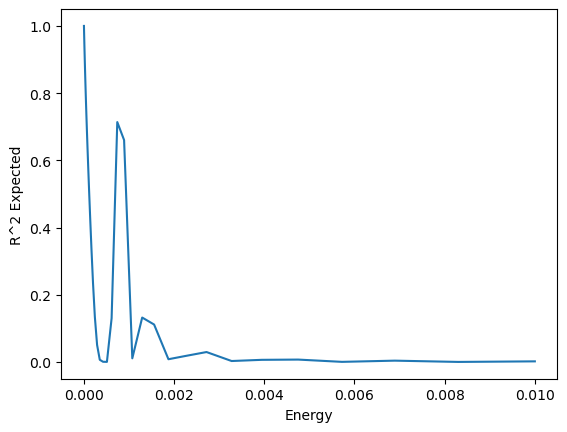

In [18]:
plt.xlabel("Energy")
plt.ylabel("R^2 Expected")
plt.plot(energies, R_expected)